## Home Task Neural Network for Signs

## Import

In [2]:
# Import necessary libraries
import os
from IPython.display import Image
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import h5py

from sklearn.neural_network import MLPClassifier

In [3]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

# `Signs`

## `Signs Dataset Overview` 

The **Signs Dataset** is a multi-class classification dataset used for recognizing **hand signs**. The dataset consists of **RGB images** of different hand gestures, where each gesture corresponds to a specific label.  

### Dataset Summary  
- **Training Samples:** 1,080  
- **Testing Samples:** 120  
- **Image Size:** 64 × 64 × 3 (Height, Width, Channels)  
- **Classes:** Multiple hand signs  


## Loading the Signs dataset

In [5]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [8]:
X_train, y_train, X_test, y_test, classes = load_dataset()

### Shape of the dataset

In [14]:
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


### Displaying Sample Images  
The **`display_samples_in_grid`** function visualizes random samples from the dataset in a grid format.  

###  How It Works:  
- Selects **random images** from the dataset.  
- Arranges them in an **n_rows × n_cols** grid.  
- Displays each image using **`plt.imshow()`**.  
- Shows corresponding **labels** as titles.  

In [15]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.choice(len(X), size=n_rows*n_cols, replace=False)

    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

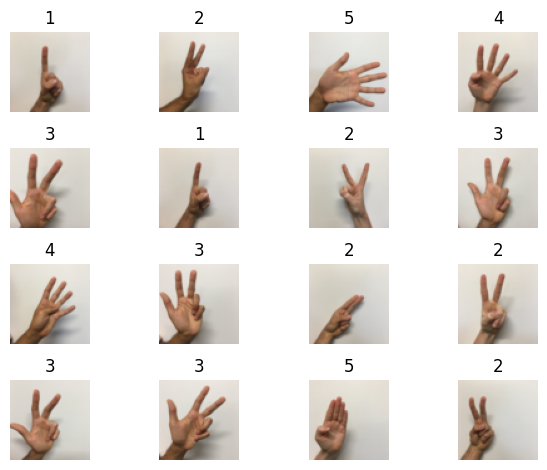

In [17]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

### Feature Scaling

In [ ]:
# YOUR_CODE.  Preproces data
# START_CODE 
# Flatten images into vectors (64*64*3 = 12288)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# # Normalize pixel values to range [0,1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

### `Neural Network Classifier`

In [ ]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
clf = MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver= 'adam', 
        random_state = 2025,
        activation = "relu", 
        max_iter= 1000,
        alpha=0.01,
    )

# Training the model
clf.fit(X_train_scaled, y_train)

# Evaluating the model
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))
# END_CODE     

train accuracy= 100.000%
test accuracy= 90.000%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

### Visualizing Model Predictions

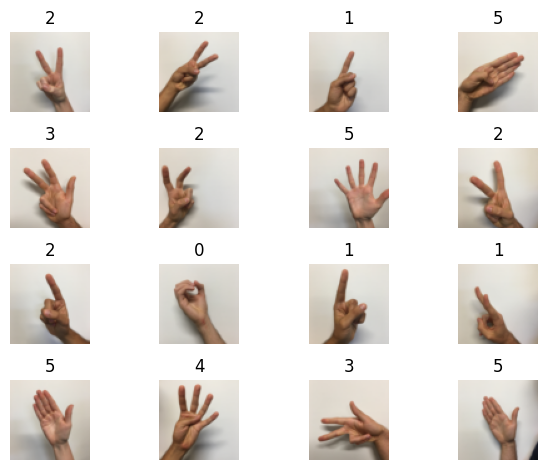

In [55]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)

### Compare with SVM 

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Hyperparameter Tuning with GridSearchCV  

**Define Parameter Grid**  
   - `C`: Regularization parameter (controls trade-off between margin size and classification error).  
   - `gamma`: Kernel coefficient (determines influence of individual training samples).  
   - `kernel`: Set to `'rbf'` (Radial Basis Function kernel).  

**Grid Search with Cross-Validation**  
   - Uses **5-fold cross-validation** (`cv=5`) to evaluate different hyperparameter combinations.  
   - Optimizes for **accuracy** (`scoring='accuracy'`).  

**Train and Evaluate the Best Model**  
   - `grid_search.best_params_`: Displays the best hyperparameter combination.  
   - `grid_search.best_estimator_.score(X_test_scaled, y_test)`: Evaluates accuracy on the test set.  

In [57]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.0001, 0.001, 0.01, 0.1], 
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Test accuracy:", grid_search.best_estimator_.score(X_test_scaled, y_test))


Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Test accuracy: 0.95


### Best parameters: `{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}`

In [53]:
clf = SVC(C=10, kernel='rbf', gamma=0.0001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 95.000%
